In [51]:
import hwacctools.quantization.quant as q
from stim_lib.stimulus_gen import generate_qracc_inputs
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.DataFrame

w,x,wx_outBits = generate_qracc_inputs(
    wDimX = 32, #nColumns
    wDimY = 128, #nRows
    xBatches = 10,
    xTrits = 1,
    outBits = 4,
    seed = 0,
    weight_mode = 'bipolar',
    col_symmetric=False
)

df(w @ x.T)

[STIM_GEN] Generating random weights


,0,1,2,3,4,5,6,7,8,9
0,5,-3,13,3,-6,-4,-2,-13,-18,8
1,9,-3,13,-9,-4,-4,12,-13,-4,10
2,-7,-11,11,-3,22,-6,-6,3,2,6
3,3,3,1,3,-2,-4,-8,13,0,-10
4,-5,-5,3,-3,2,-12,0,5,2,0
5,17,7,11,-1,12,8,16,-9,4,4
6,7,-3,-1,-17,4,4,12,3,6,-4
7,-1,-5,3,-3,-4,-2,-8,13,14,12
8,-7,-7,-13,1,16,2,2,1,-6,-2
9,-3,-19,-5,-7,8,0,6,-21,-6,10


### Problem 1

The AMS simulations vs this tend to produce such and such spreads

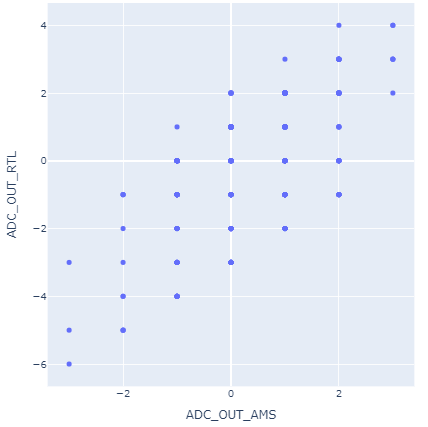

which is really bad.

Turns out, this is because I use binary weights in the reference RTL while the AMS is in bipolar mode.
Let's see if that actually turns out to be the same spread.

Findings
* w_bin and w_bip are the exact same data-wise. seed works.
* The spread looks like this

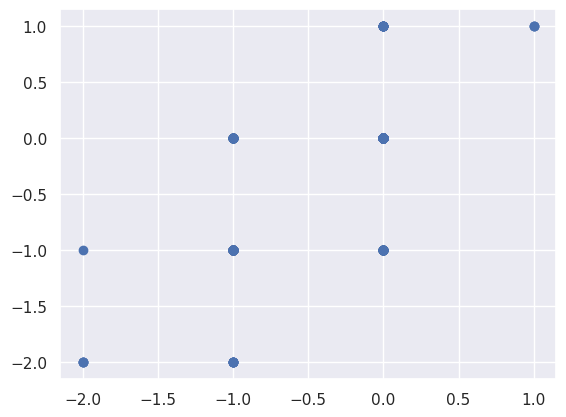

[STIM_GEN] Generating random weights
[STIM_GEN] Generating random weights


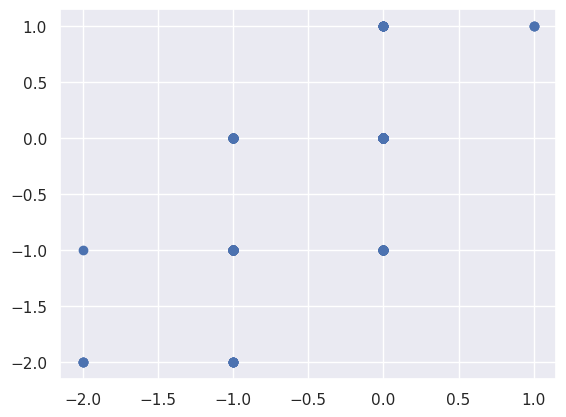

In [52]:

w_bin,x_bin,wx_bin = generate_qracc_inputs(
    wDimX = 32, #nColumns
    wDimY = 128, #nRows
    xBatches = 10,
    xTrits = 1,
    outBits = 4,
    seed = 0,
    weight_mode = 'binary',
    col_symmetric=False
)

w_bip,x_bip,wx_bip = generate_qracc_inputs(
    wDimX = 32, #nColumns
    wDimY = 128, #nRows
    xBatches = 10,
    xTrits = 1,
    outBits = 4,
    seed = 0,
    weight_mode = 'bipolar',
    col_symmetric=False
)

assert (w_bin - (w_bip + 1)/2).any() == False

import matplotlib.pyplot as plt
plt.scatter(wx_bin, wx_bip)

In [78]:
wx_bip = w_bip @ x_bip.T
rounded_bip = np.round(wx_bip / 2**2).astype(int)
shifted_bip = q.saturating_clip(wx_bip,6,4)
df(rounded_bip),df(shifted_bip)
px.scatter(x=rounded_bip.flatten(),y=shifted_bip.flatten(),labels={'x':'Rounded','y':'Shifted'},title='Rounded vs Shifted Bipolar Multiplication',width=600,height=600)